## Estimating mean and covariance from normal distributed data

### Introduction

In a previous notebook we demonstrated that the eigenvalues and eigenvectors of the covariance matrix contain important information about the distribution. There, we used the covariance matrix that was used to generate the data. In general we don't know this matrix and we must estimate this from the data itself. Here, we show that these estimators work reasonably well if the data is from a Gaussain distribution. If the data is not from a Gaussian distribution, this process can still be used to decorrelate the data.

### Learning Objectives
In this notebook you will learn
- how to implement maximum likelihood estimation in Python
- how to compare the estimated eigenvectors to the theoretical ones

### Exercise

There is an exercise at the end of this notebook!

[[79. 20.]
 [20. 37.]]


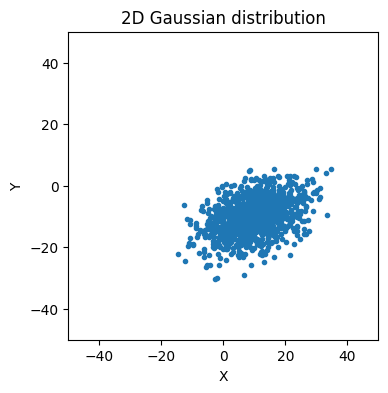

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 100

rng = default_rng()

import numpy as np
mean = [10.,-10.]

direction_1 = np.array([5,2])
direction_2 = np.array([-2,5])
cov = 3.*np.outer(direction_1,direction_1) + 1.*np.outer(direction_2,direction_2)
print(cov)

sample=rng.multivariate_normal(mean, cov, size=1000)

plt.plot(sample.T[0],sample.T[1],'.')

plt.xlabel('X')
plt.ylabel('Y')
limit=50
plt.xlim([-limit,limit])
plt.ylim([-limit,limit])
plt.title('2D Gaussian distribution')
plt.savefig('gausssample.pdf')

The mean can be estimate using
$$
\bar{x} = \frac{1}{N} \sum^{N}_{i=1} \boldsymbol{x}_i,
$$
where $N$ is the number of data points and $\boldsymbol{x}_i$ is data point $i$, i.e. a two dimensional tuple $({x_1}_i, {x_2}_i)$.

In [3]:
mean=(np.array([sample.T[0].sum(),sample.T[1].sum()])/sample.shape[0])
print('MLE for mu is: ',mean)

MLE for mu is:  [ 9.94830299 -9.93183788]


(-50.0, 50.0)

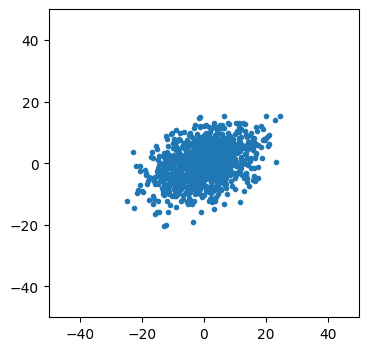

In [4]:
diff=sample-mean
plt.plot(diff.T[0],diff.T[1],'.')
plt.xlim([-limit,limit])
plt.ylim([-limit,limit])

Next we can use the MLE solution for the covariance matrix to calculate it, given by:

$ \Sigma = \frac{1}{N} \sum^{N}_{i=1} (\boldsymbol{x}_i - \bar{\boldsymbol{x}})(\boldsymbol{x}_i - \bar{\boldsymbol{x}})^T$

In [5]:
# the following construction calculates a so-called generator of xx^T for each data point
# it is then summed over all data points
scat=sum(np.outer(x,x) for x in diff)/sample.shape[0]
print(scat)


[[70.30733102 19.606276  ]
 [19.606276   35.9508178 ]]


This is not a million miles from the original covariance matrix. We can calculate the eigen directions as in Example 1.6.1. We can also calculate the eigen directions of the original covariance matrix

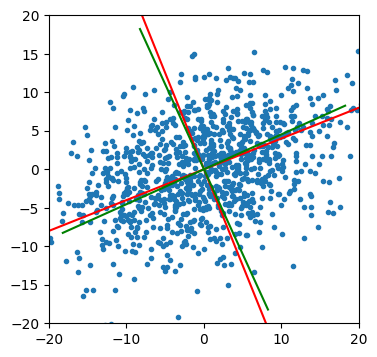

In [6]:
eigvalues, eigvecs = np.linalg.eig(cov)

plt.plot(diff.T[0],diff.T[1],'.')

def plotEigenDirections(eigvecs,c, limit = 20):
    n_points = 100
    dir1 = limit*np.linspace(-eigvecs[:,0][0], eigvecs[:,0][0],n_points)
    dir2 = limit*np.linspace(-eigvecs[:,0][1], eigvecs[:,0][1],n_points)
    plt.plot(dir1,dir2,c)

    dir3 = limit*np.linspace(-eigvecs[:,1][0], eigvecs[:,1][0],n_points)
    dir4 = limit*np.linspace(-eigvecs[:,1][1], eigvecs[:,1][1],n_points)
    plt.plot(dir3,dir4,c)
    plt.xlim([-limit,limit])
    plt.ylim([-limit,limit])

plotEigenDirections(eigvecs,'r-',limit=30)
eigvaluessc, eigvecssc = np.linalg.eig(scat)
plotEigenDirections(eigvecssc,'g-')

Even if there are some numerical differences in the entries of the estimated covariance matrix and the 'true' covariance matrix, the differences in eigen directions are not visible relative to the data.

As mentioned in the lectures, MLE solution for the mean and covariance of a Gaussian distribution can also be estimated numerically by optimising/maximising the log-likelihood function with respect to the unknown parameters or equivalently, minimizing the negative log-likelihood function. Code below shows an example of how this is done for the univariate case. This is especially relevant when you are dealing with distributions that do not have a closed form solution for their constituent parameters.

5.003388867188334
9.640571576449453


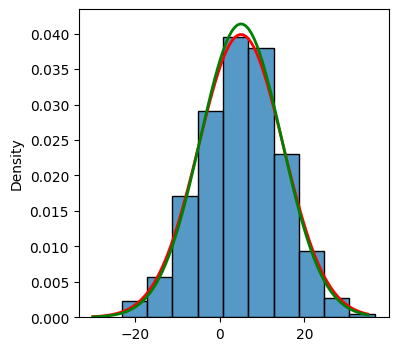

In [7]:
import scipy
from scipy.stats import norm, t
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

# Define the likelihood function
def log_likelihood(params, data):
    mu, sigma = params
    return -np.sum(norm.logpdf(data, mu, sigma))

## We create some synthetic data sampled from a Gaussian distribution with mean=5 and std. dev. = 10.0
data = np.random.normal(loc=5.0,scale=10.0,size=1000)
sns.histplot(data.T,bins=10,stat='density')

# Next lets see how well we can approximate the mean and variance numerically using MLE
# Initial guess for unknown parameters
sigma = 5.0
mean = 2.0
initial_guess = [mean, sigma]

# Perform maximum likelihood estimation (MLE) to fit the Gaussian distribution
result = minimize(log_likelihood, initial_guess, args=(data,))
mu_est, sigma_est = result.x

# Print the mean and covariance estimated by numerically maximising the log-likelihood function
print(mu_est)
print(sigma_est)

# We can also overlay the probability density functions resulting from using the true and estimated values for mean and std. dev.
x = np.linspace(-30,35,100)
y_true = norm.pdf(x, 5.0, 10.0)
y_est = norm.pdf(x, mu_est, sigma_est)

plt.plot(x, y_true, 'r', linewidth=2)
plt.plot(x, y_est, 'g', linewidth=2)

We see that the estimated mean and standard deviation are not miles off the true values. Experiment with changing the initial estimates for mean and sigma in the code above. How do the final estimates change? What does this tell you? Look up the 'norm' class under scipy stats and see whether there is an easier way to automatically fit a normal/Gaussian distribution to your data.

### Exercise

Your boss - who is not a great artist - comes to you and asks you to write code for a synthetic dataset that looks reasonably like the one below. Please do this. Show both a labelled and an unlabelled version of your dataset.

In [8]:
from IPython.display import Image

fig = Image(filename=('./desiredsample.png'))
fig

FileNotFoundError: [Errno 2] No such file or directory: './desiredsample.png'

In [ ]:
## Add your answer below
# Sample answer


mu_1 = np.array([3,-1.5])
cov_1  = 1.*np.outer( np.array([1.,0.]),np.array([1.,0.])) + 0.2*np.outer(np.array([0.,1.]),np.array([0.,1.]))
sample_blue=rng.multivariate_normal(mu_1, cov_1, size=100)


mu_2  = np.array([4.,1.])
cov_2 = 1*np.outer( np.array([1,1]),np.array([1,1])) + 0.2*np.outer(np.array([1,-1]),np.array([1,-1]))

sample_red = rng.multivariate_normal(mu_2, cov_2, size=100)

mu_3  = np.array([4.,1.])
cov_3 = np.outer(np.array([-1.,2]),np.array([-1.,2]))  + 0.01*np.outer(np.array([2,1]),np.array([2,1]))

sample_green = rng.multivariate_normal(mu_3, cov_3, size=100)

In [ ]:
plt.plot(sample_blue.T[0],sample_blue.T[1],'b.')
plt.plot(sample_red.T[0],sample_red.T[1],'r.')
plt.plot(sample_green.T[0],sample_green.T[1],'g.')
plt.xlim([-3,6])
plt.ylim([-3,6])